In [1]:
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
from soliket import BinnedClusterLikelihood
from cobaya.model import get_model
import camb

params = {
    'cosmomc_theta': 0.0104135,
    'ns': 0.965,
    'ombh2': 0.0226576,      
    'omch2': 0.1206864, 
    'As': 2.022662e-9,
    'tenToA0': 4.35e-5,
    'B0': 0.08,
    'scatter_sz': 0.,
    'bias_sz': 1.,
    'tau': 0.055,
    'mnu': 0.0,
    'nnu': 3.046,
    'omnuh2': 0.,
    'w': -1
}

info = {
    'params': params,
    'likelihood': {'soliket.BinnedClusterLikelihood': {
        'single_tile_test': "no",
        'choose_dim': "1D",
        'Q_optimise': "yes",
        'stop_at_error': True,
        'data_path': "/Users/eunseonglee/SOLikeT/soliket/binned_clusters/data/so/",
        'cat_file': "MFMF_WebSkyHalos_A10tSZ_3freq_tiles/MFMF_WebSkyHalos_A10tSZ_3freq_tiles_mass.fits",
        'Q_file': "MFMF_WebSkyHalos_A10tSZ_3freq_tiles/selFn/quick_theta_Q.npz",
        'tile_file': "MFMF_WebSkyHalos_A10tSZ_3freq_tiles/selFn/tileAreas.txt",
        'rms_file': "MFMF_WebSkyHalos_A10tSZ_3freq_tiles/selFn/downsampled.txt"}},
    'theory': {'camb': {'extra_args': {'num_massive_neutrinos': 0}}}
}

# initialisation 
model = get_model(info)
like = model.likelihood['soliket.BinnedClusterLikelihood']
model.loglikes({})[0]

Populating the interactive namespace from numpy and matplotlib
[prior] *WARNING* No sampled parameters requested! This will fail for non-mock samplers.
[camb] Importing *global* CAMB.
[camb] Initialized!
 :::::: this is initialisation in binned_clusters.py
 :::::: reading catalogue
 Number of mass bins :  138
 SO for a full map
 1D likelihood as a function of redshift
 Total number of clusters in catalogue =  62475
 SNR cut =  5.0
 Number of clusters above the SNR cut =  43232
 The highest redshift = 2.62
 Number of redshift bins =  27
 Catalogue N
0 316.0
1 2175.0
2 4000.0
3 5081.0
4 5369.0
5 5253.0
6 4587.0
7 3992.0
8 3233.0
9 2565.0
10 1912.0
11 1418.0
12 1104.0
13 734.0
14 526.0
15 341.0
16 226.0
17 155.0
18 101.0
19 60.0
20 40.0
21 22.0
22 11.0
23 4.0
24 6.0
25 0.0
26 1.0
27 0.0
43232.0
 :::::: loading files describing selection function
 :::::: reading Q as a function of theta
 Number of Q functions =  1
 Using one averaged Q function for optimisation
 :::::: reading noise data
 

array([-156.60346553])

In [2]:
pk_intp = like.theory.get_Pk_interpolator(("delta_nonu", "delta_nonu"), nonlinear=False)
SZparams = {
    'tenToA0': 4.35e-5,
    'B0': 0.08,
    'scatter_sz': 0.,
    'bias_sz': 1.    
}
Nz = like._get_theory(pk_intp, **SZparams)

0 493.86332678696675
1 2112.1600644539794
2 4018.6875961108403
3 5141.741834496721
4 5478.69927125679
5 5248.0626252949005
6 4676.624892064351
7 3948.2315553657054
8 3192.871081193255
9 2491.1984045654376
10 1884.9770562115211
11 1388.286669057495
12 998.1245856673435
13 702.0429260630522
14 483.97358949081257
15 327.46639425750203
16 217.75523621632613
17 142.44426469207067
18 91.75503857388176
19 58.241896946554306
20 36.460156007200226
21 22.523098233483058
22 13.739873634568873
23 8.281539004086437
24 4.935495429526129
25 2.9099181707420168
26 1.6987295361785448
 Total predicted N =  43187.75711878129
 ::: theory N calculation took 0.2 seconds


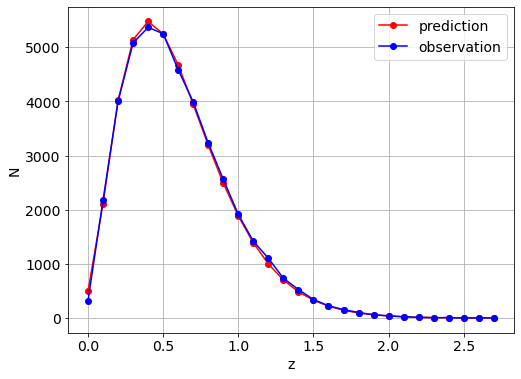

In [3]:
z, catNz = like.delNcat

plt.figure(figsize=(8,6))
plt.plot(z, Nz, 'ro-', label='prediction')
plt.plot(z, catNz, 'bo-', label='observation')
plt.xlabel('z', fontsize=14)
plt.ylabel('N', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()